# <font color = #119fbf> **Trabalho Final - Processo de Ciência de Dados**</font>

* Graduação em Engenharia da Computação
* Tópicos Especiais em Computação I
* UFC Campus Sobral – 2024.1


## Equipe 06:


1. **Dnilson Correia de Sousa - 495986**

2. **Francisco Silvan Felipe do Carmo - 496641**

3. **Francisco Wendel Alves Ribeiro - 510424**

4. **Gabriel Araújo Texeira - 511476**

5. **Israel da Silva Pereira - 497145**

6. **João Artur Sales Rocha - 511375**

7. **Matheus Nunes Vieira - 510011**



# 1. Introdução
A primeira etapa envolve o carregamento do dataset e a importação das bibliotecas necessárias.

## Análise de Acidentes de Trânsito no Brasil - 2023
Neste notebook, analisamos dados de acidentes de trânsito ocorridos no Brasil em 2023, fornecidos pela Polícia Rodoviária Federal (PRF). Usaremos a metodologia OSEMN (Obtain, Scrub, Explore, Model, Interpret) para guiar nosso processo de análise e construção de um modelo preditivo.


# 2. Obtenção dos Dados (Obtain)
Aqui, primeiramente importamos as bibliotecas e na sequência obtemos e carregamos o dataset para começarmos o processo de exploração.

In [ ]:
import pandas as pd
import gdown
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [ ]:
# URL do dataset no Google Drive
url = 'https://drive.google.com/uc?export=download&id=16Nv4ws9XVNQMHyTPoSDMYKwLiYUiokNX'
output = 'datatran2023.csv'

# Baixar o arquivo CSV
gdown.download(url, output, quiet=False)

# Carregar o dataset
df = pd.read_csv(output, encoding='latin1', delimiter=';')

Downloading...
From: https://drive.google.com/uc?export=download&id=16Nv4ws9XVNQMHyTPoSDMYKwLiYUiokNX
To: /content/datatran2023.csv
100%|██████████| 19.8M/19.8M [00:00<00:00, 168MB/s]


In [ ]:
# Verificar as primeiras linhas do dataset
df.head()

id data_inversa dia_semana   horario  uf   br     km  \
0  496519   2023-01-01    domingo  02:00:00  ES  101    114   
1  496543   2023-01-01    domingo  03:40:00  SP  116  113,1   
2  496590   2023-01-01    domingo  01:40:00  MT  163   1112   
3  496610   2023-01-01    domingo  10:40:00  PR  376  314,8   
4  496659   2023-01-01    domingo  14:55:00  MG  116  569,4   

           municipio                            causa_acidente  \
0          SOORETAMA            Ausência de reação do condutor   
1            TAUBATE             Entrada inopinada do pedestre   
2  GUARANTA DO NORTE  Reação tardia ou ineficiente do condutor   
3         ORTIGUEIRA                   Velocidade Incompatível   
4           MANHUACU         Acumulo de água sobre o pavimento   

               tipo_acidente  ... feridos_graves ilesos ignorados feridos  \
0  Saída de leito carroçável  ...              0      0         0       1   
1  Atropelamento de Pedestre  ...              0      0         4       0   
2                 Tombamento  ...              1      0         2       1   
3                 Tombamento  ...              0      1         2       0   
4            Colisão frontal  ...              2      1         1       2   

  veiculos      latitude     longitude  regional  delegacia             uop  
0        1  -19,09484877  -40,05095848   SPRF-ES   DEL04-ES  UOP01-DEL04-ES  
1        2   -23,0445658  -45,58259814   SPRF-SP   DEL02-SP  UOP02-DEL02-SP  
2        3   -9,70020602  -54,87588757   SPRF-MT   DEL06-MT  UOP03-DEL06-MT  
3        3    -23,985512    -51,083555   SPRF-PR   DEL07-PR  UOP02-DEL07-PR  
4        3  -20,10007457  -42,17884091   SPRF-MG   DEL06-MG  UOP03-DEL06-MG  

[5 rows x 30 columns]

O dataset foi carregado com sucesso e contém dados de 2023 relacionados a acidentes de trânsito no Brasil. A seguir, faremos uma limpeza dos dados para garantir que estejam prontos para análise.

# 3. Limpeza dos Dados (Scrub)
Nesta etapa, removemos valores nulos, tratamos colunas com formato incorreto (ex.: latitude, longitude, datas) e verificamos se há valores inválidos.

In [ ]:
# Verificar valores nulos
missing_values = df.isnull().sum()
print("Valores nulos por coluna:\n", missing_values)

# Remover linhas com valores nulos nas colunas críticas
df_cleaned = df.dropna(subset=['classificacao_acidente', 'regional', 'delegacia', 'uop']).copy()

# Converter a coluna 'data_inversa' para o tipo datetime
df_cleaned['data_inversa'] = pd.to_datetime(df_cleaned['data_inversa'], format='%Y-%m-%d')
df_cleaned.loc[:, 'horario'] = pd.to_datetime(df_cleaned['horario'], errors='coerce', format='%H:%M:%S').dt.hour

# Converter latitude e longitude para float (removendo vírgulas)
df_cleaned['latitude'] = df_cleaned['latitude'].str.replace(',', '.').astype(float)
df_cleaned['longitude'] = df_cleaned['longitude'].str.replace(',', '.').astype(float)


Valores nulos por coluna:
 id                         0
data_inversa               0
dia_semana                 0
horario                    0
uf                         0
br                         0
km                         0
municipio                  0
causa_acidente             0
tipo_acidente              0
classificacao_acidente     1
fase_dia                   0
sentido_via                0
condicao_metereologica     0
tipo_pista                 0
tracado_via                0
uso_solo                   0
pessoas                    0
mortos                     0
feridos_leves              0
feridos_graves             0
ilesos                     0
ignorados                  0
feridos                    0
veiculos                   0
latitude                   0
longitude                  0
regional                  17
delegacia                 32
uop                       46
dtype: int64


Abaixo mostraremos a tabela com os valores já tratados (limpos).

In [ ]:
# Exibir informações após a limpeza
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67719 entries, 0 to 67756
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      67719 non-null  int64         
 1   data_inversa            67719 non-null  datetime64[ns]
 2   dia_semana              67719 non-null  object        
 3   horario                 67719 non-null  object        
 4   uf                      67719 non-null  object        
 5   br                      67719 non-null  int64         
 6   km                      67719 non-null  object        
 7   municipio               67719 non-null  object        
 8   causa_acidente          67719 non-null  object        
 9   tipo_acidente           67719 non-null  object        
 10  classificacao_acidente  67719 non-null  object        
 11  fase_dia                67719 non-null  object        
 12  sentido_via             67719 non-null  object     

Análise:

*  **Valores nulos**: Encontramos valores ausentes em algumas colunas, como regional, delegacia e uop. Como são colunas críticas para nossa análise, decidimos remover as linhas correspondentes.
*   **Datas e coordenadas geográficas**: A coluna de data foi convertida para o formato datetime, o que nos permitirá realizar análises temporais posteriormente. A latitude e a longitude foram convertidas para tipo float para viabilizar a plotagem de mapas interativos.


Após a limpeza, o dataset está mais consistente e pronto para ser explorado.

# 4. Exploração dos Dados (Explore)

## 4.1 Análise Descritiva Inicial
Antes de fazermos as visualizações, verificamos a distribuição dos valores numéricos (ex.: mortos, feridos).

In [ ]:
# Exibir um resumo estatístico das colunas numéricas
df_cleaned.describe()

id                   data_inversa            br  \
count   67719.000000                          67719  67719.000000   
mean   535124.319408  2023-07-06 11:17:17.434103040    209.369365   
min    496506.000000            2023-01-01 00:00:00      0.000000   
25%    516204.500000            2023-04-08 00:00:00    101.000000   
50%    535123.000000            2023-07-07 00:00:00    155.000000   
75%    553982.500000            2023-10-06 00:00:00    324.000000   
max    615885.000000            2023-12-31 00:00:00    498.000000   
std     22093.142728                            NaN    129.646531   

            pessoas        mortos  feridos_leves  feridos_graves  \
count  67719.000000  67719.000000   67719.000000    67719.000000   
mean       2.614835      0.083064       0.878409        0.279803   
min        1.000000      0.000000       0.000000        0.000000   
25%        2.000000      0.000000       0.000000        0.000000   
50%        2.000000      0.000000       1.000000        0.000000   
75%        3.000000      0.000000       1.000000        0.000000   
max       95.000000      7.000000      61.000000       29.000000   
std        2.290634      0.331368       1.103980        0.616818   

             ilesos     ignorados       feridos      veiculos      latitude  \
count  67719.000000  67719.000000  67719.000000  67719.000000  67719.000000   
mean       1.062818      0.401453      1.158213      1.997785    -18.944845   
min        0.000000      0.000000      0.000000      1.000000    -33.588291   
25%        0.000000      0.000000      1.000000      1.000000    -25.157146   
50%        1.000000      0.000000      1.000000      2.000000    -20.481003   
75%        1.000000      1.000000      1.000000      2.000000    -12.852410   
max       61.000000     88.000000     62.000000    131.000000      4.476284   
std        1.809273      0.893169      1.228621      1.217263      7.680046   

          longitude  
count  67719.000000  
mean     -46.510177  
min      -70.268638  
25%      -50.292336  
50%      -47.383659  
75%      -42.483023  
max      -34.828400  
std        6.143988

Análise:


*   **Mortes e feridos**: A média de mortos e feridos por acidente pode ser observada aqui. Esta análise inicial ajuda a identificar se há valores extremos que possam indicar outliers.
*   **Verificação de outliers**: Se houver valores muito altos, podemos decidir se são erros ou se refletem casos reais.






## 4.2 Distribuição das Condições Climáticas
Agora vamos visualizar a distribuição das condições climáticas durante os acidentes.

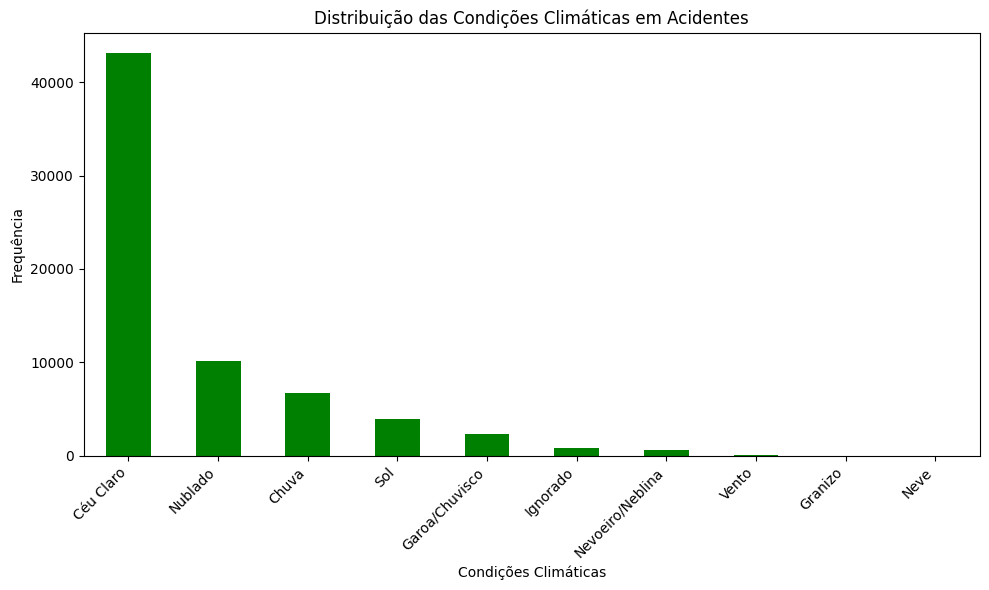

In [ ]:
# Distribuição das condições climáticas
plt.figure(figsize=(10, 6))
df_cleaned['condicao_metereologica'].value_counts().plot(kind='bar', color='green')
plt.title('Distribuição das Condições Climáticas em Acidentes')
plt.xlabel('Condições Climáticas')
plt.ylabel('Frequência')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


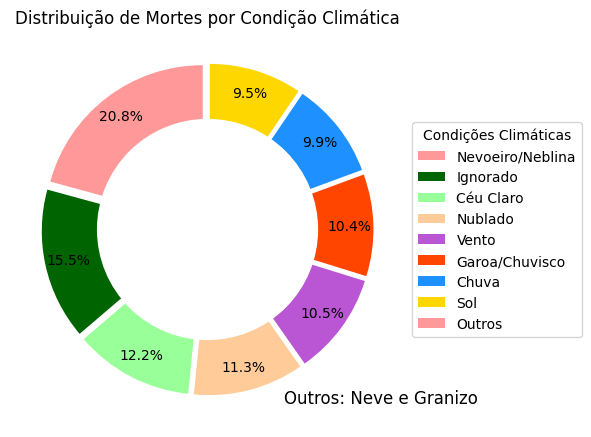

In [ ]:
# Criar uma nova coluna com o total de vítimas (mortos + feridos graves + feridos leves)
df_cleaned['total_vitimas'] = df_cleaned['mortos'] + df_cleaned['feridos_graves'] + df_cleaned['feridos_leves']

# Agrupar por condicao_metereologica e somar os valores
df_grouped_clima = df_cleaned.groupby('condicao_metereologica')[['mortos', 'total_vitimas']].sum()

# Calcular a porcentagem de mortos em relação ao total de vítimas
df_grouped_clima['percentual_mortos'] = (df_grouped_clima['mortos'] / df_grouped_clima['total_vitimas']) * 100

# Substituir valores NaN por 0, que ocorrem quando o total de vítimas é zero
df_grouped_clima['percentual_mortos'].fillna(0, inplace=True)

# Criar uma classe "Outros" para Granizo e Neve
condicoes_agrupadas = df_grouped_clima.copy()
condicoes_agrupadas.loc['Outros'] = condicoes_agrupadas.loc[['Granizo', 'Neve']].sum()

# Remover as entradas originais de "Granizo" e "Neve"
condicoes_agrupadas = condicoes_agrupadas.drop(['Granizo', 'Neve'], errors='ignore')

# Ordenar os valores pela porcentagem de mortos (ordem decrescente)
df_grouped_clima_sorted = condicoes_agrupadas.sort_values(by='percentual_mortos', ascending=False)

# Função para formatar valores muito pequenos como uma string vazia
def autopct_format(pct):
    return ('' if pct < 0.1 else f'{pct:.1f}%')

# Verificar se há dados suficientes para gerar o gráfico
if not df_grouped_clima_sorted.empty:

    # Plotar o gráfico de pizza com a porcentagem de mortos
    plt.figure(figsize=(6, 6))

    # Criação do gráfico de pizza
    wedges, texts, autotexts = plt.pie(
        df_grouped_clima_sorted['percentual_mortos'],
        labels=None,
        autopct=autopct_format,
        startangle=90,
        colors=[
            '#FF9999',
            '#006400',
            '#99FF99',
            '#FFCC99',
            '#BA55D3',
            '#FF4500',
            '#1E90FF',
            '#FFD700'
        ][:len(df_grouped_clima_sorted)],
        pctdistance=0.85,
        explode=[0.05] * len(df_grouped_clima_sorted)
    )

    # Adicionar título
    plt.title('Distribuição de Mortes por Condição Climática')

    # Melhorar o espaçamento das porcentagens e texto
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontsize(10)

    # Centralizar o gráfico para melhor visualização
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    # Adicionar legenda para "Outros"
    plt.legend(
        wedges,
        df_grouped_clima_sorted.index,
        loc="center left",
        bbox_to_anchor=(1, 0.5),
        title="Condições Climáticas",
    )

    # Adicionar explicação para a classe "Outros"
    plt.text(1.1, -1.1, 'Outros: Neve e Granizo', fontsize=12, ha='center')

    # Ajustar o layout
    plt.tight_layout()
    plt.show()

else:
    print("Nenhum dado disponível para gerar o gráfico.")



Os gráficos mostram que a maioria dos acidentes ocorre em condições de Céu Claro, mas essas situações têm uma mortalidade moderada. Em contraste, condições como Nevoeiro/Neblina e quando o clima é Ignorado apresentam a maior proporção de mortes, mesmo com menos ocorrências. Isso sugere que, embora acidentes em condições climáticas adversas sejam menos frequentes, eles são muito mais fatais quando acontecem.





## 4.3 Top 10 Causas de Acidentes
Aqui vamos explorar as principais causas de acidentes.

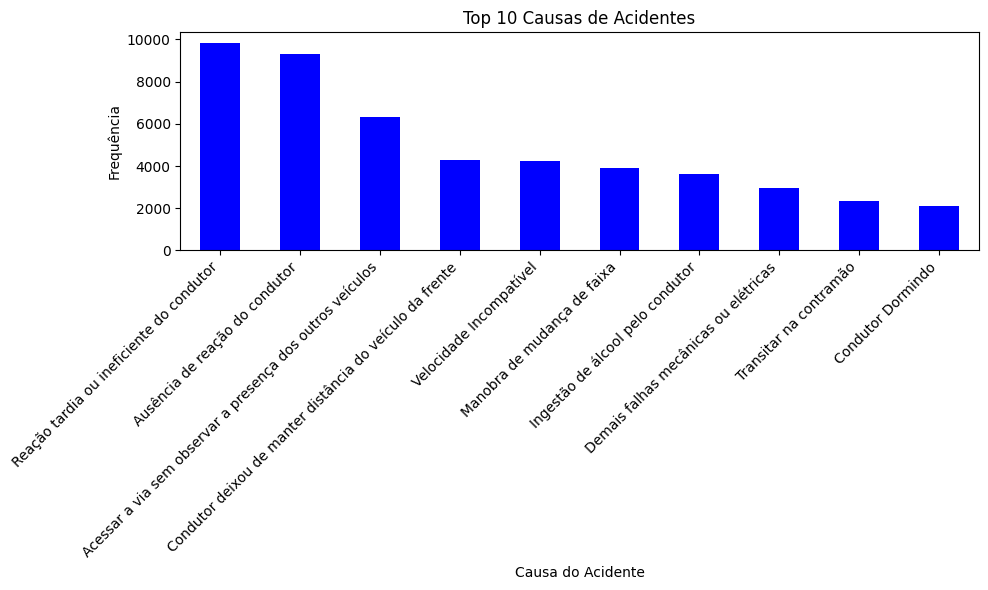

In [ ]:
# Top 10 causas de acidentes
plt.figure(figsize=(10, 6))
df_cleaned['causa_acidente'].value_counts().head(10).plot(kind='bar', color='blue')
plt.title('Top 10 Causas de Acidentes')
plt.xlabel('Causa do Acidente')
plt.ylabel('Frequência')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


O gráfico acima demonstra que grande parte dos acidentes estão atrelados à falta de atenção e à velocidade incompatível. Além disso, observando as principais causas de acidentes, concluímos que medidas como uma melhora na fiscalização, campanhas de conscientização, políticas para controle de velocidade e monitoramento dos condutores, podem ser relevantes para uma diminuição do contingente de acidentes.

## 4.4 Relação Entre Causas e Número de Mortes
Agora vamos visualizar quais causas estão mais relacionadas a mortes.

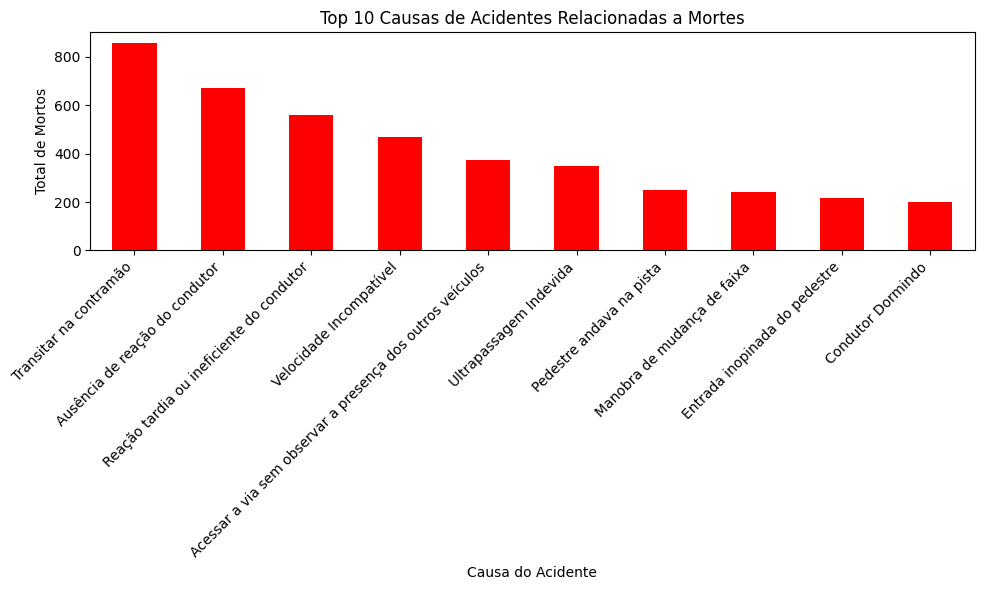

In [ ]:
# Causas de acidentes relacionadas a mortes
plt.figure(figsize=(10, 6))
df_grouped_causa_mortos = df_cleaned.groupby('causa_acidente')['mortos'].sum().sort_values(ascending=False).head(10)
df_grouped_causa_mortos.plot(kind='bar', color='red')
plt.title('Top 10 Causas de Acidentes Relacionadas a Mortes')
plt.xlabel('Causa do Acidente')
plt.ylabel('Total de Mortos')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Os gráficos mostram que transitar na contramão e a ausência de reação do condutor estão entre as principais causas de mortes, mas transitar na contramão, em particular, é responsável pela maior ocorrência de óbitos. Em contraste, a análise da seção [4.3](#scrollTo=eLhzsqwbOYCy) indicava que essa infração era apenas a nona causa mais comum de acidentes. Isso sugere que, embora acidentes envolvendo a contramão não sejam tão frequentes, eles são significativamente mais fatais quando ocorrem, destacando a gravidade das violações de regras básicas de trânsito.

## 4.5 Top 10 Tipos de Acidentes e Gravidade
Aqui vamos explorar os principais tipos de acidentes em relação com as gravidades dos mesmos.

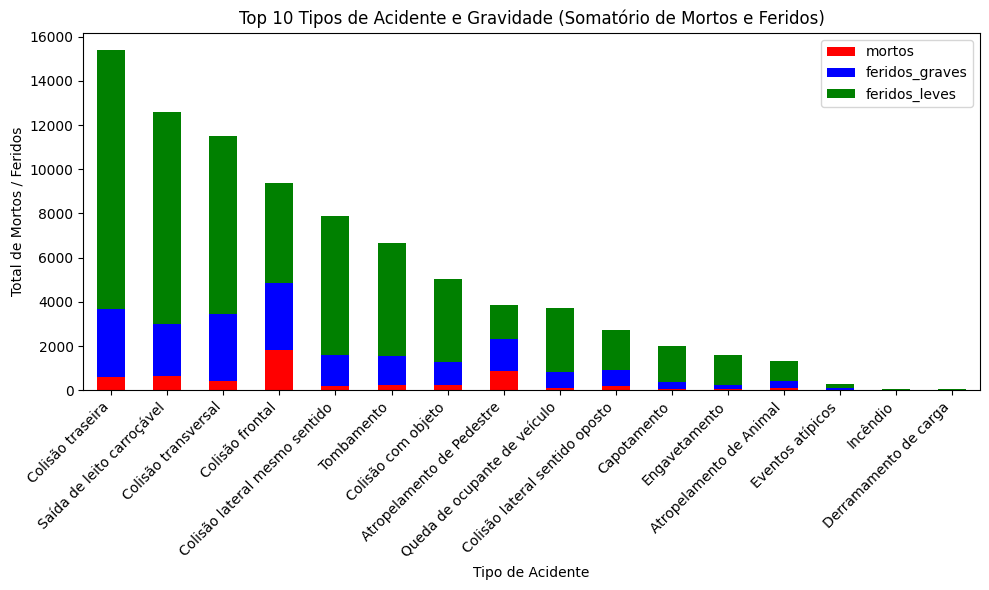

In [ ]:
# Criar uma nova coluna com o somatório dos feridos graves, leves e mortos
df_cleaned['total_impacto'] = df_cleaned['mortos'] + df_cleaned['feridos_graves'] + df_cleaned['feridos_leves']

# Agrupar por tipo de acidente e ordenar pelo somatório
df_grouped_tipo_acidente_impacto = df_cleaned.groupby('tipo_acidente')[['mortos', 'feridos_graves', 'feridos_leves', 'total_impacto']].sum().sort_values(by='total_impacto', ascending=False)

# Plotar o gráfico
df_grouped_tipo_acidente_impacto[['mortos', 'feridos_graves', 'feridos_leves']].plot(kind='bar', stacked=True, color=['red', 'blue', 'green'], figsize=(10, 6))
plt.title('Top 10 Tipos de Acidente e Gravidade (Somatório de Mortos e Feridos)')
plt.xlabel('Tipo de Acidente')
plt.ylabel('Total de Mortos / Feridos')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

O gráfico mostra que "Colisão traseira" é o tipo de acidente mais comum, embora a maioria das vítimas tenha ferimentos leves. No entanto, acidentes como "Saída de leito carroçável" e "Colisão frontal" são mais graves, com uma maior proporção de feridos graves e mortos, indicando que esses tipos de acidentes requerem atenção especial. Acidentes como "Atropelamento de pedestre" também apresentam alta gravidade, apesar de serem menos frequentes.

## 4.6 Distribuição dos Acidentes durante os horários do dia

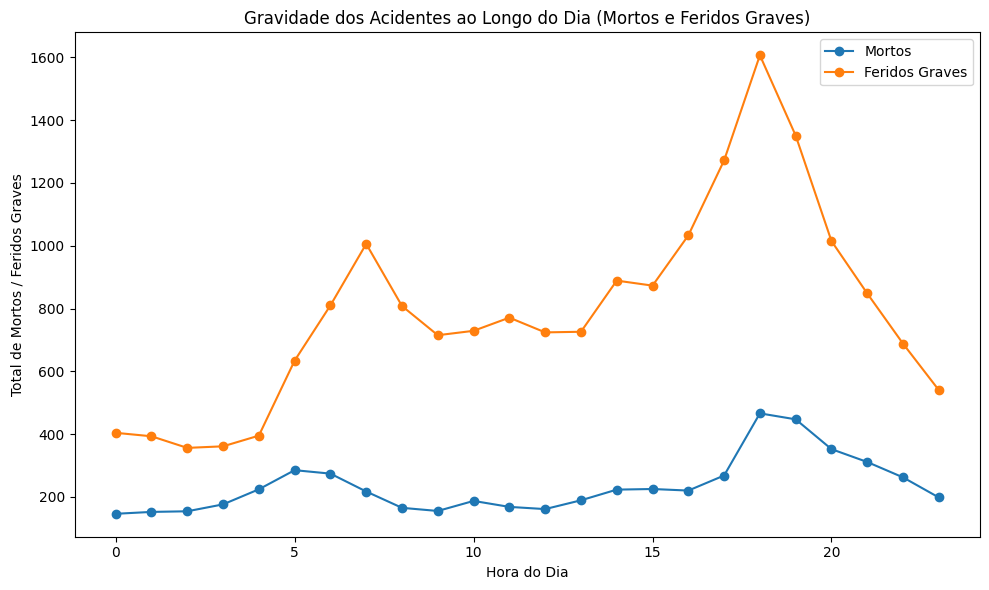

In [ ]:
# Refazer a visualização da gravidade dos acidentes ao longo do dia (Mortos e Feridos Graves)
plt.figure(figsize=(10, 6))
data = df_cleaned.groupby('horario')[['mortos', 'feridos_graves']].sum()
plt.plot(data.index, data['mortos'], marker='o', label='Mortos')
plt.plot(data.index, data['feridos_graves'], marker='o', label='Feridos Graves')
plt.title('Gravidade dos Acidentes ao Longo do Dia (Mortos e Feridos Graves)')
plt.xlabel('Hora do Dia')
plt.ylabel('Total de Mortos / Feridos Graves')
plt.legend()
plt.tight_layout()
plt.show()

O gráfico mostra que os acidentes com feridos graves têm picos nos horários de maior trânsito, entre 6h-8h e 16h-18h, coincidindo com os horários de pico. Já o número de mortos permanece estável ao longo do dia, com um leve aumento entre 18h e 20h. Ambos os indicadores diminuem durante a noite e a madrugada. Isso sugere que o volume de tráfego e fatores como fadiga e condições de visibilidade no fim do dia podem aumentar a gravidade dos acidentes.

## 4.7 Distribuição Geográfica dos Acidentes
Agora, vamos criar um mapa interativo para visualizar a distribuição geográfica dos acidentes. O mapa revela a concentração de acidentes em determinadas regiões, permitindo a identificação de pontos críticos em rodovias específicas. Essas informações podem auxiliar na alocação de recursos e na implementação de medidas de segurança para reduzir acidentes nessas áreas.:


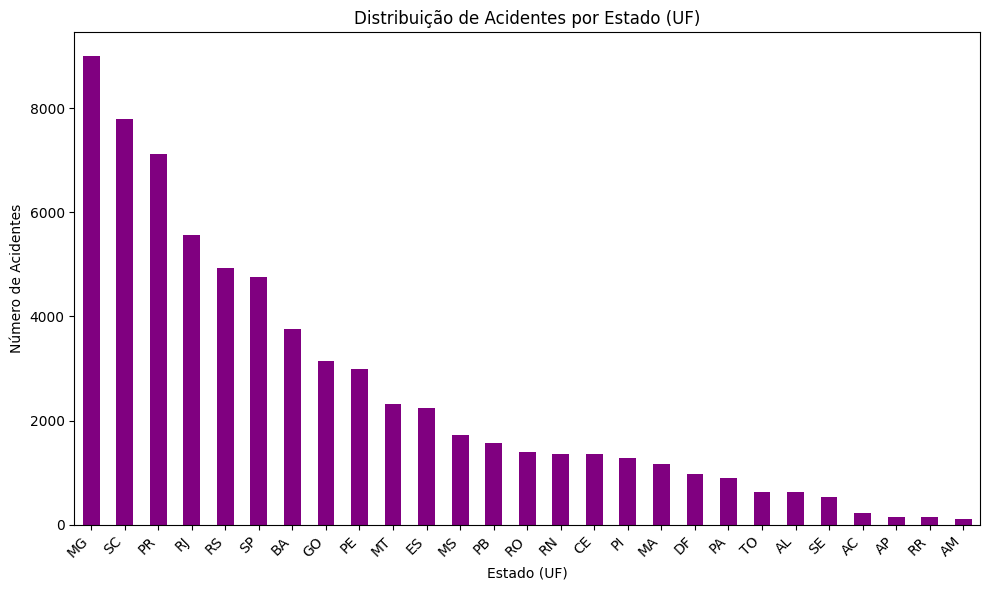

In [ ]:
# Distribuição de acidentes por estado (UF)
plt.figure(figsize=(10, 6))
df_cleaned['uf'].value_counts().plot(kind='bar', color='purple')
plt.title('Distribuição de Acidentes por Estado (UF)')
plt.xlabel('Estado (UF)')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

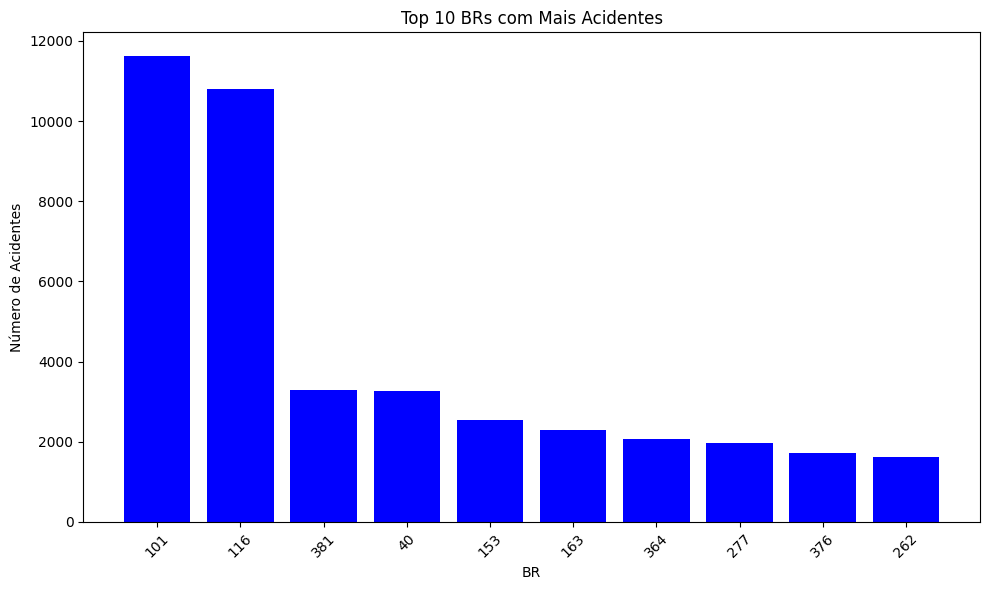

In [ ]:
br_accident_count = df_cleaned['br'].value_counts().reset_index()

# Ordenar as BRs pela contagem de acidentes e pegar as 10 mais frequentes
br_accident_count  = br_accident_count.sort_values(by='count', ascending=False).head(10)

# Criar gráfico
plt.figure(figsize=(10, 6))
plt.bar(br_accident_count['br'].astype(str), br_accident_count['count'], color='blue')
plt.xlabel('BR')
plt.ylabel('Número de Acidentes')
plt.title('Top 10 BRs com Mais Acidentes')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

In [ ]:
# Mapa interativo dos acidentes
fig = px.scatter_mapbox(df_cleaned, lat="latitude", lon="longitude", hover_name="uf",
                        hover_data=["causa_acidente", "mortos", "feridos_graves"],
                        color="tipo_acidente", zoom=4, height=600,
                        labels={"tipo_acidente": "Tipos de Acidentes"})

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(
    title="Distribuição Geográfica dos Acidentes de Trânsito por Tipo de Acidente",
    legend_title="Tipos de Acidentes",
    legend=dict(
        title="Tipos de Acidentes",
        traceorder="normal",
        itemsizing="constant",
        itemclick="toggleothers"
    )
)
fig.show()

# 5. Modelagem Preditiva (Model)
Agora que temos uma boa compreensão dos dados, podemos tentar prever a gravidade dos acidentes usando modelos de aprendizado de máquina. Vamos utilizar o Random Forest, um modelo poderoso para classificação.

In [ ]:
# Agrupando os dados com as colunas relevantes para predição
df_grouped = df_cleaned[['latitude', 'longitude', 'dia_semana', 'horario', 'causa_acidente', 'tipo_acidente', 'classificacao_acidente']]

# Preparar os dados
X = df_grouped.drop(['classificacao_acidente'], axis=1)

# Codificar variáveis categóricas
label_encoder = LabelEncoder()
for column in ['dia_semana', 'causa_acidente', 'tipo_acidente']:
    X[column] = label_encoder.fit_transform(X[column])

# Codificar a variável alvo 'classificacao_acidente'
y_class = label_encoder.fit_transform(df_grouped['classificacao_acidente'])

# Aplicar OverSampling para balancear as classes
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y_class)

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train_class, y_test_class = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Treinar o modelo Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train_class)

# Fazer previsões
y_pred_class = rf_classifier.predict(X_test)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Acurácia: {accuracy:.4f}")

Acurácia: 0.9525


In [ ]:
# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test_class, y_pred_class, target_names=label_encoder.classes_))


Relatório de Classificação:
                     precision    recall  f1-score   support

 Com Vítimas Fatais       0.96      1.00      0.98     10330
Com Vítimas Feridas       0.98      0.87      0.92     10304
        Sem Vítimas       0.92      0.98      0.95     10521

           accuracy                           0.95     31155
          macro avg       0.95      0.95      0.95     31155
       weighted avg       0.95      0.95      0.95     31155



<a id="secao-5-1"></a>

##5.1 Matriz de Confusão

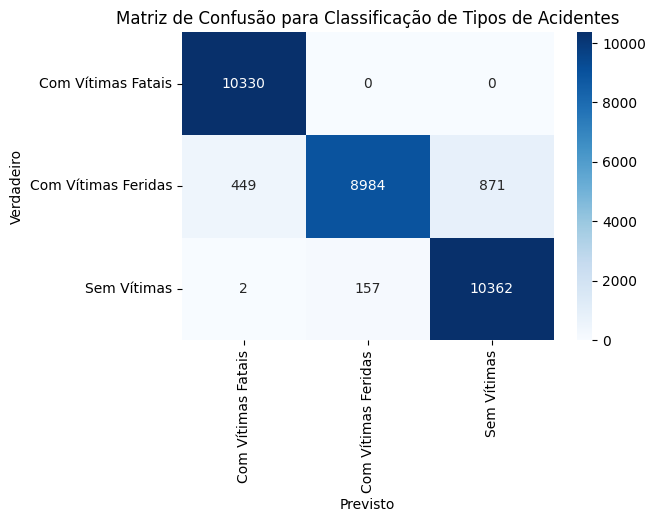

In [ ]:
# Matriz de confusão
conf_matrix = confusion_matrix(y_test_class, y_pred_class)

# Plotar a matriz de confusão
plt.figure(figsize=(6,4))
plt.title("Matriz de Confusão para Classificação de Tipos de Acidentes")
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Previsto")
plt.ylabel("Verdadeiro")
plt.show()


## 5.2 Curva ROC

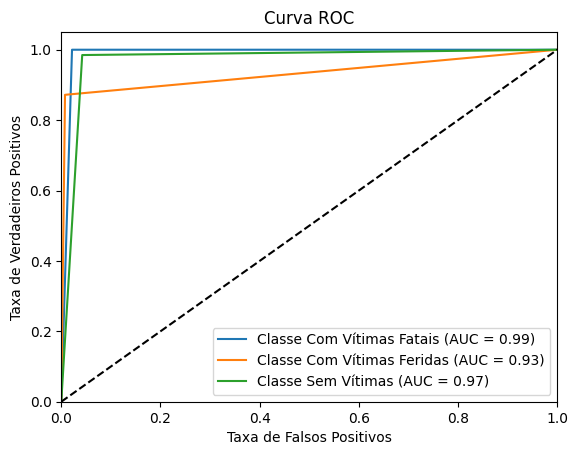

In [ ]:
y_test_bin = label_binarize(y_test_class, classes=[0, 1, 2])  # Binarizar as classes, ajustar conforme necessário
y_pred_bin = label_binarize(y_pred_class, classes=[0, 1, 2])

for i in range(len(label_encoder.classes_)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Classe {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


## 5.3 Importância das Features

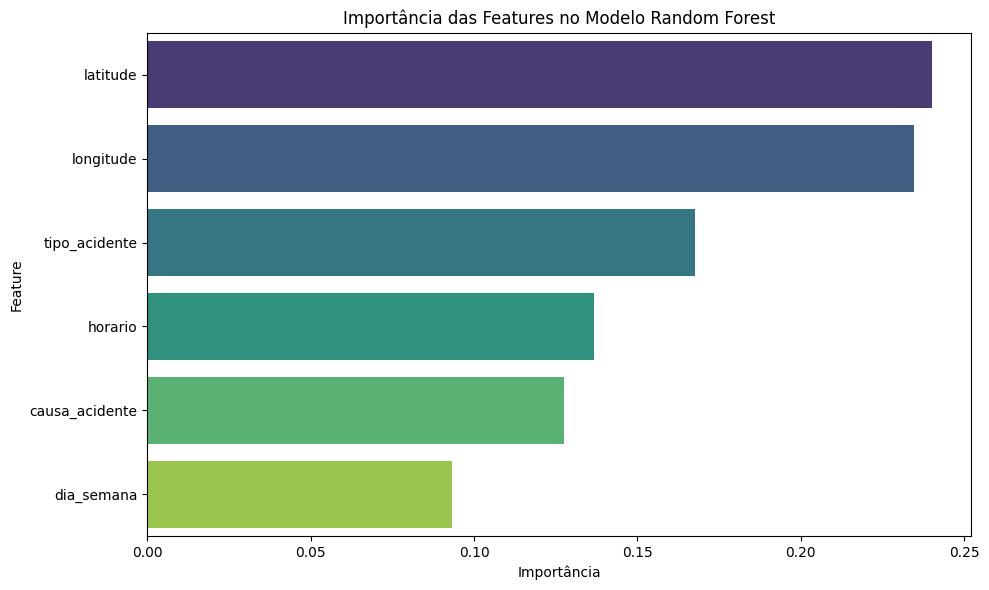

In [ ]:
# Calcular a importância das features
importances = rf_classifier.feature_importances_
feature_names = X.columns

# Criar um DataFrame para a importância das features
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualizar a importância das features com um gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis', hue='Feature', dodge=False, legend=False)
plt.title('Importância das Features no Modelo Random Forest')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


# 6. Interpretação dos Dados (iNterpret)
Este passo se mostra relevante para dar significado ao que o modelo apresentou como saída, o que aquela predição representa e como ela pode ser aplicada.

A partir da matriz de confusão do tópico [5.1](#scrollTo=ksiOTRihUKrv&line=3&uniqifier=1), é possível inferirmos que o modelo tem um desempenho sólido, com uma alta acurácia geral (95,25%). Isso pode ser observado principalmente na correta classificação de acidentes "Com Vítimas Fatais" e "Sem Vítimas". Esses dois grupos possuem números muito baixos de erros, indicando que o modelo tem uma boa compreensão desses extremos. Entretanto, na classe "Com Vítimas Feridas" encontra-se o maior desafio do modelo. Embora o número de classificações corretas (8.984) seja alto, essa classe apresentou 1.320 erros, o que mostra um valor considerável de imprecisão.

A curva ROC presente no tópico [5.2](#scrollTo=d4ajvGPBUbts&line=1&uniqifier=1) mostra que o modelo é eficiente para distinguir entre as classes de acidentes, sendo mais preciso para acidentes "Com Vítimas Fatais". No entanto, para a classe "Com Vítimas Feridas", há uma leve queda na performance, sugerindo que esse grupo pode ser mais difícil de classificar corretamente. Isso pode ser usado para ajustar o modelo e melhorar ainda mais sua precisão para essa classe específica.

Já no tópico [5.3](#scrollTo=HWUI-8A4UVM2&line=1&uniqifier=1), a interpretação do gráfico sugere que as variáveis relacionadas à localização geográfica (latitude, longitude) e ao tipo de acidente são as mais importantes para o modelo prever a gravidade dos acidentes. Outros fatores como causa do acidente e horário também têm impacto significativo. Isso nos permite inferir que fatores tanto geográficos quanto temporais desempenham um papel crucial na severidade dos acidentes. Essa análise pode guiar futuras investigações e ações preventivas, focando em áreas de risco ou em causas que aparecem frequentemente associadas a acidentes graves.

